In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('Sales_Data.csv')


In [48]:
df.head(5)

,SalesOrderLineKey,ProductKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Product Standard Cost,Total Product Cost,Sales Amount
0,43659001,349,5,1,"$2,024.99","$2,024.99","$1,898.09","$1,898.09","$2,024.99"
1,43659002,350,5,3,"$2,024.99","$6,074.98","$1,898.09","$5,694.28","$6,074.98"
2,43659003,351,5,1,"$2,024.99","$2,024.99","$1,898.09","$1,898.09","$2,024.99"
3,43659004,344,5,1,"$2,039.99","$2,039.99","$1,912.15","$1,912.15","$2,039.99"
4,43659005,345,5,1,"$2,039.99","$2,039.99","$1,912.15","$1,912.15","$2,039.99"


In [49]:
def clean_currency_column(column):
    return pd.to_numeric(column.replace({'\$': '', ',': ''}, regex=True))

# Clean and convert the 'Sales Amount' column
df['Sales Amount'] = clean_currency_column(df['Sales Amount'])

# Clean and convert the 'Product Standard Cost' column
df['Product Standard Cost'] = clean_currency_column(df['Product Standard Cost'])

# Clean and convert the 'Total Product Cost' column
df['Total Product Cost'] = clean_currency_column(df['Total Product Cost'])

df['Unit Price'] = clean_currency_column(df['Unit Price'])

df['Extended Amount'] = clean_currency_column(df['Extended Amount'])

'''df.drop(columns=['Unit Price Discount Pct'], inplace=True)
df.drop(columns=['OrderDateKey'], inplace=True)
df.drop(columns=['DueDateKey'], inplace=True)
df.drop(columns=['ShipDateKey'], inplace=True)
df.drop(columns=['SalesOrderLineKey'], inplace=True)
df.drop(columns=['ResellerKey'], inplace=True)'''


"df.drop(columns=['Unit Price Discount Pct'], inplace=True)\ndf.drop(columns=['OrderDateKey'], inplace=True)\ndf.drop(columns=['DueDateKey'], inplace=True)\ndf.drop(columns=['ShipDateKey'], inplace=True)\ndf.drop(columns=['SalesOrderLineKey'], inplace=True)\ndf.drop(columns=['ResellerKey'], inplace=True)"

In [50]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(df.head(5))

,SalesOrderLineKey,ProductKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Product Standard Cost,Total Product Cost,Sales Amount
0,43659001,349,5,1,2024.99,2024.99,1898.09,1898.09,2024.99
1,43659002,350,5,3,2024.99,6074.98,1898.09,5694.28,6074.98
2,43659003,351,5,1,2024.99,2024.99,1898.09,1898.09,2024.99
3,43659004,344,5,1,2039.99,2039.99,1912.15,1912.15,2039.99
4,43659005,345,5,1,2039.99,2039.99,1912.15,1912.15,2039.99


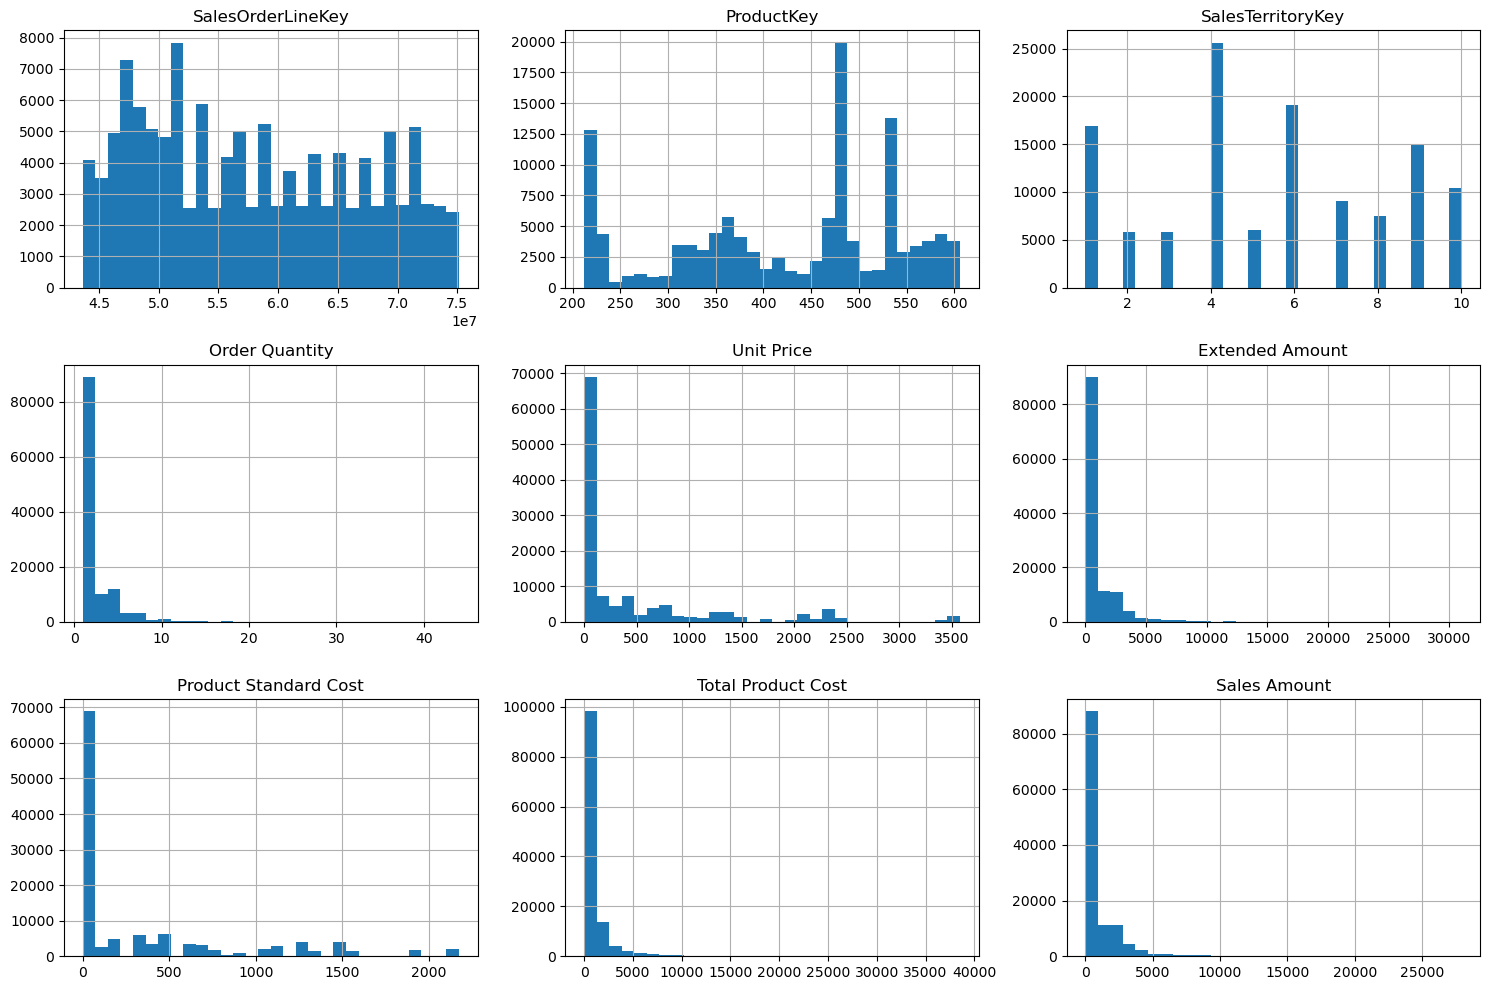

In [51]:
# Histogram for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()



In [52]:
Territory_df = pd.read_csv('Sales_Territory.csv')

In [53]:
merged_df = pd.merge(df, Territory_df, on='SalesTerritoryKey')

In [54]:
grouped_data = merged_df.groupby(['Region', 'Country', 'Group']).agg({'Sales Amount': 'sum'}).reset_index()

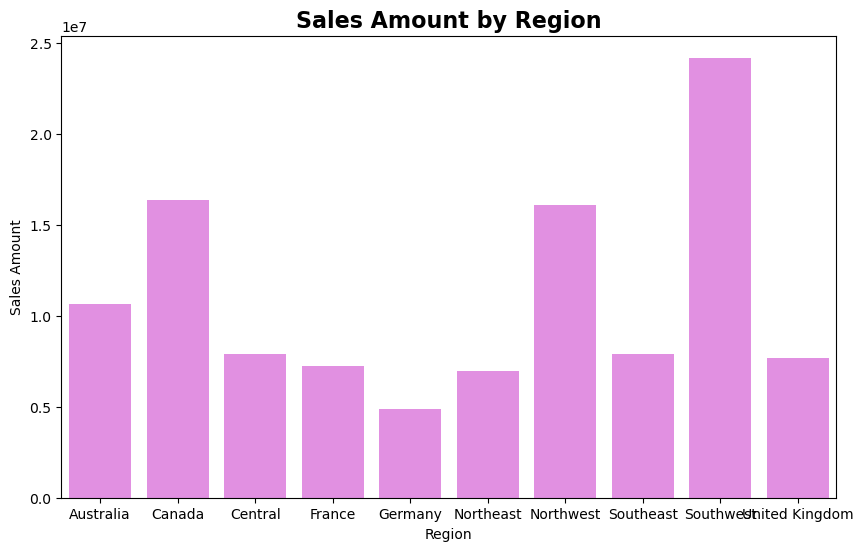

In [74]:
# Visualization 1: Bar plot of Sales Amount by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales Amount', data=grouped_data, color='violet')
plt.title('Sales Amount by Region', fontsize=16, fontweight='bold')
plt.show()

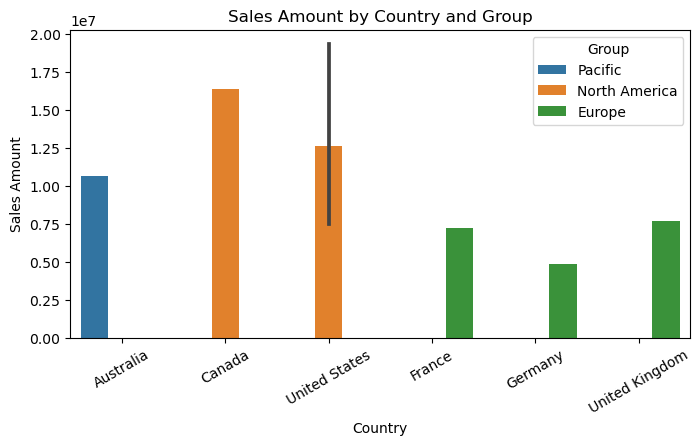

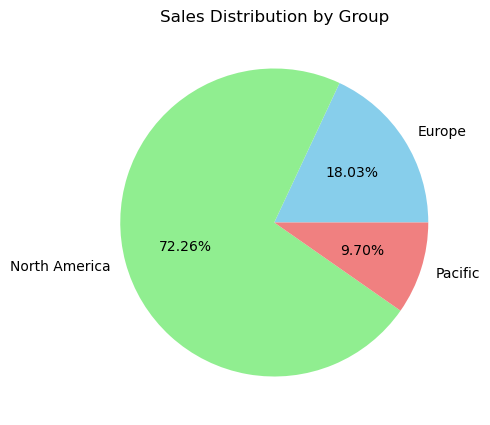

In [77]:
# Visualization 2: Bar plot of Sales Amount by Country
plt.figure(figsize=(8, 4))
sns.barplot(x='Country', y='Sales Amount', hue='Group', data=grouped_data)
plt.title('Sales Amount by Country and Group')
plt.xticks(rotation=30)
plt.show()

# Visualization 3: Pie chart of Sales by Group
plt.figure(figsize=(5, 5))
grouped_data.groupby('Group')['Sales Amount'].sum().plot(kind='pie', autopct='%1.2f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Sales Distribution by Group')
plt.ylabel('')
plt.show()

In [57]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.layouts import column

In [78]:
# Bokeh Visualization: Bar plot of Sales Amount by Region
output_file("sales_by_region.html")

regions = grouped_data['Region'].unique().tolist()
sales_by_region = grouped_data.groupby('Region')['Sales Amount'].sum()

source = ColumnDataSource(data=dict(regions=regions, sales=sales_by_region))

p = figure(x_range=regions, height=400, title="Sales Amount by Region",
           toolbar_location=None, tools="")

p.vbar(x='regions', top='sales', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('regions', palette="Spectral11", factors=regions))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Region"
p.yaxis.axis_label = "Sales Amount"
p.yaxis.formatter.use_scientific = False

# Bokeh Visualization: Bar plot of Sales Amount by Country
output_file("sales_by_country.html")

countries = grouped_data['Country'].unique().tolist()
sales_by_country = grouped_data.groupby('Country')['Sales Amount'].sum()

source_country = ColumnDataSource(data=dict(countries=countries, sales=sales_by_country))

p2 = figure(x_range=countries, height=400, title="Sales Amount by Country",
            toolbar_location=None, tools="")

p2.vbar(x='countries', top='sales', width=0.9, source=source_country,
        line_color='white', fill_color=factor_cmap('countries', palette="Spectral11", factors=countries))

p2.xgrid.grid_line_color = None
p2.y_range.start = 0
p2.xaxis.major_label_orientation = 1.2
p2.xaxis.axis_label = "Country"
p2.yaxis.axis_label = "Sales Amount"
p2.yaxis.formatter.use_scientific = False

# Bokeh Visualization: Pie chart of Sales by Group
output_file("sales_by_group.html")

group_sales = grouped_data.groupby('Group')['Sales Amount'].sum()
groups = group_sales.index.tolist()
sales = group_sales.values.tolist()

# Calculate the angles for the pie chart
total_sales = sum(sales)
angles = [sales_i/total_sales * 2*pi for sales_i in sales]
start_angles = [sum(angles[:i]) for i in range(len(angles))]
end_angles = [sum(angles[:i+1]) for i in range(len(angles))]

# Add the angles to the ColumnDataSource
group_source = ColumnDataSource(data=dict(groups=groups, sales=sales,
                                          start_angle=start_angles, end_angle=end_angles))

p3 = figure(height=350, title="Sales Distribution by Group", toolbar_location=None,
            tools="hover", tooltips="@groups: @sales", x_range=(-0.5, 1.0))

p3.wedge(x=0, y=1, radius=0.4,
         start_angle='start_angle', end_angle='end_angle', line_color="white", source=group_source,
         fill_color=factor_cmap('groups', palette="Spectral11", factors=groups))

# Show the plots
show(column(p, p2, p3))